### SCORES DE SEVERIDADE

#### Hospital-free days post 45 day (HFD-45)

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import GEOparse

#download and load to the memory the experiment with specific GEO accession
gse157103 = GEOparse.get_GEO("GSE157103")
metadata = gse157103.phenotype_data

21-Jan-2021 16:09:32 DEBUG utils - Directory ./ already exists. Skipping.
21-Jan-2021 16:09:32 INFO GEOparse - File already exist: using local version.
21-Jan-2021 16:09:32 INFO GEOparse - Parsing ./GSE157103_family.soft.gz: 
21-Jan-2021 16:09:32 DEBUG GEOparse - DATABASE: GeoMiame
21-Jan-2021 16:09:32 DEBUG GEOparse - SERIES: GSE157103
21-Jan-2021 16:09:32 DEBUG GEOparse - PLATFORM: GPL24676
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753021
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753022
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753023
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753024
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753025
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753026
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753027
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753028
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753029
21-Jan-2021 16:09:32 DEBUG GEOparse - SAMPLE: GSM4753030
21-Jan-2021 16:09:32 DEBUG GEOpars

In [3]:
import seaborn as sns

metadata['characteristics_ch1.9.hospital-free days post 45 day followup (days)'] = pd.to_numeric(metadata['characteristics_ch1.9.hospital-free days post 45 day followup (days)'],errors='coerce')

metadata["characteristics_ch1.9.hospital-free days post 45 day followup (days)"].values
sns.histplot(x="characteristics_ch1.9.hospital-free days post 45 day followup (days)", 
             hue='characteristics_ch1.0.disease state', palette="ch:.25", data=metadata)


AttributeError: module 'seaborn' has no attribute 'histplot'

Distribuições de dias livres do hospital ao longo de um período contínuo de 45 dias agregados à sobrevivência.
Os pacientes do grupo não COVID-19 tinham, em média, consideravelmente mais HFD-45 do que aqueles do grupo COVID-19.

In [4]:
from scipy import stats

cv = metadata[metadata['characteristics_ch1.0.disease state']=='COVID-19']
ncv = metadata[metadata['characteristics_ch1.0.disease state']=='non-COVID-19']

cv_hfd = cv['characteristics_ch1.9.hospital-free days post 45 day followup (days)']
ncv_hfd = ncv['characteristics_ch1.9.hospital-free days post 45 day followup (days)']

print("Teste à normalidade dos dados:")
print('COVID-19', stats.shapiro(cv_hfd)) # p-value <0.05 - H0 rejected
print('non-COVID-19',  stats.shapiro(ncv_hfd)) # p-value <0.05 - H0 rejected
#For alpha level = 0.05:
#if p-value < 0.05 - H0 (data are normally distributed) is rejected
#if p-value > 0.05 - H0 is not rejected

print("Rejeita-se H0, uma vez que as amostras não seguem distribuição normal.\n") 
#Será então necessário proceder a testes não paramétricos para testar a mediana das populações.
print("Teste U de Mann-Whitney")
#teste não paramétrico aplicado para duas amostras independentes

print(stats.mannwhitneyu(cv_hfd, ncv_hfd, alternative = 'less'))
print("Rejeita-se H0, os dois grupos não têm a mesma mediana.")

Teste à normalidade dos dados:
COVID-19 ShapiroResult(statistic=0.8425031900405884, pvalue=6.32884189499805e-09)
non-COVID-19 ShapiroResult(statistic=0.6970590353012085, pvalue=4.834085302718449e-06)
Rejeita-se H0, uma vez que as amostras não seguem distribuição normal.

Teste U de Mann-Whitney
MannwhitneyuResult(statistic=791.5, pvalue=0.0009940081528354407)
Rejeita-se H0, os dois grupos não têm a mesma mediana.


O valor do score HFD-45 atribuído aos doentes é menor, em mediana, nos casos em que o diagnóstico de COVID-19 é positivo do que nos casos em que este diagnóstico é negativo (pvalue=0.00099). Este resultado é consistente com a definição do score, uma vez que scores mais baixos correspondem a situações mais graves de internamento ou morte.

#### SCORES Charlson comorbidity index, APACHEII e SOFA

In [12]:
gse157103 = GEOparse.get_GEO("GSE157103")
metadata = gse157103.phenotype_data

15-Jan-2021 18:06:03 DEBUG utils - Directory ./ already exists. Skipping.
15-Jan-2021 18:06:03 INFO GEOparse - File already exist: using local version.
15-Jan-2021 18:06:03 INFO GEOparse - Parsing ./GSE157103_family.soft.gz: 
15-Jan-2021 18:06:03 DEBUG GEOparse - DATABASE: GeoMiame
15-Jan-2021 18:06:03 DEBUG GEOparse - SERIES: GSE157103
15-Jan-2021 18:06:03 DEBUG GEOparse - PLATFORM: GPL24676
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753021
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753022
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753023
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753024
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753025
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753026
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753027
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753028
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753029
15-Jan-2021 18:06:03 DEBUG GEOparse - SAMPLE: GSM4753030
15-Jan-2021 18:06:04 DEBUG GEOpars

In [5]:
#create a new dataframe
scores = metadata[['characteristics_ch1.4.apacheii', 'characteristics_ch1.5.charlson score','characteristics_ch1.16.sofa' ]]
scores.head(15)

,characteristics_ch1.4.apacheii,characteristics_ch1.5.charlson score,characteristics_ch1.16.sofa
GSM4753021,15,0,8
GSM4753022,unknown,2,unknown
GSM4753023,unknown,2,unknown
GSM4753024,unknown,1,unknown
GSM4753025,19,1,7
GSM4753026,unknown,1,unknown
GSM4753027,unknown,7,unknown
GSM4753028,43,7,16
GSM4753029,31,2,12
GSM4753030,34,1,15


Scores de severidade (APACHEII,CHARLSTON e SOFA)de cada paciente.

Values are strings.

characteristics_ch1.4.apacheii 

characteristics_ch1.3.icu                   no     yes
characteristics_ch1.0.disease state                   
COVID-19                             19.714286  21.580
non-COVID-19                          4.000000  20.625


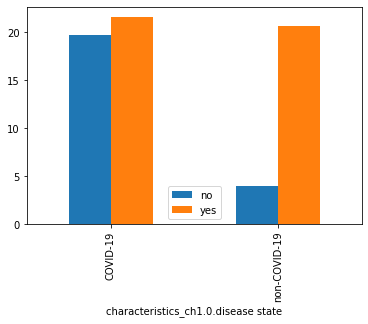

characteristics_ch1.5.charlson score 

characteristics_ch1.3.icu              no   yes
characteristics_ch1.0.disease state            
COVID-19                             3.12  3.44
non-COVID-19                         3.30  5.00


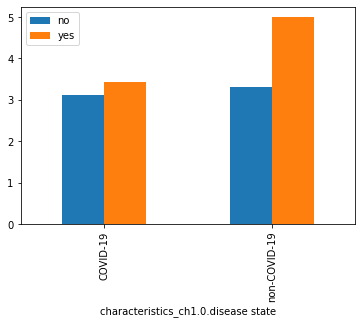

characteristics_ch1.16.sofa 

characteristics_ch1.3.icu             no     yes
characteristics_ch1.0.disease state             
COVID-19                             6.5  8.3000
non-COVID-19                         1.0  8.5625


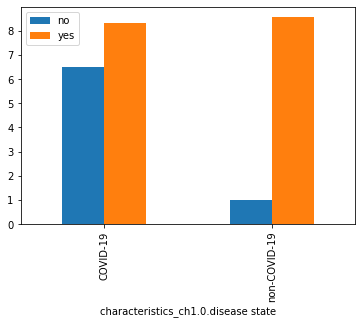

In [6]:
#Convert String numbers to Integer in Pandas DataFrame
scores = metadata[['characteristics_ch1.4.apacheii', 'characteristics_ch1.5.charlson score','characteristics_ch1.16.sofa' ]]
for score in scores:
       
    metadata[score] = pd.to_numeric(metadata[score],errors='coerce')
        
    table=pd.pivot_table(metadata,values = score,index=["characteristics_ch1.0.disease state"],columns=['characteristics_ch1.3.icu'],aggfunc=np.mean)
    print(score, "\n")
    print(table)
    table.plot(kind='bar')
    plt.legend()
    plt.show()
    

Análise das diferenças entre os grupos COVID-19 e não-COVID-19 em IUC para os diferentes scores. São representados valores médios de cada score de cada grupo.

In [16]:
cv = metadata[metadata['characteristics_ch1.0.disease state']=='COVID-19']
ncv = metadata[metadata['characteristics_ch1.0.disease state']=='non-COVID-19']

cv_iuc = cv[cv["characteristics_ch1.3.icu"]=="yes"]
ncv_iuc = ncv[ncv["characteristics_ch1.3.icu"]=="yes"]

for score in scores:
    cv_iuc_score = cv_iuc[score]
    ncv_iuc_score = ncv_iuc[score]

    print("Teste à normalidade dos dados:")
    print('COVID-19 /', score, stats.shapiro(cv_iuc_score))
    print('non-COVID-19 /', score, stats.shapiro(ncv_iuc_score),"\n")

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.4.apacheii (0.9830883741378784, 0.687343418598175)
non-COVID-19 / characteristics_ch1.4.apacheii (0.92143315076828, 0.177878737449646) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.5.charlson score (0.8693323731422424, 5.393660831032321e-05)
non-COVID-19 / characteristics_ch1.5.charlson score (0.9138711094856262, 0.13436259329319) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.16.sofa (0.9536594152450562, 0.04831695556640625)
non-COVID-19 / characteristics_ch1.16.sofa (0.9044427871704102, 0.09470410645008087) 



Os grupos referentes ao score APACHEII seguem uma distribuição normal (p<0.05).
Os grupos referentes ao score Charlson e SOFA não seguem a mesma distribuição (p>0.05).

In [17]:
print("Teste U de Mann-Whitney")

scores_normal = ['characteristics_ch1.4.apacheii']
scores_not_normal = ['characteristics_ch1.5.charlson score', 'characteristics_ch1.16.sofa']

for score in scores_not_normal:
    cv_iuc_score = cv_iuc[score]
    ncv_iuc_score = ncv_iuc[score]

    print(stats.mannwhitneyu(cv_iuc_score, ncv_iuc_score), score)
#print("p-value > 0.05. Não se rejeita H0, os grupos têm a mesma mediana.\n")

print("ttest")
for score in scores_normal:
    print(stats.ttest_ind(cv_iuc_score, ncv_iuc_score), score)
#print("p-value > 0.05. Não se rejeita H0, os grupos têm a mesma média.")

Teste U de Mann-Whitney
MannwhitneyuResult(statistic=227.0, pvalue=0.004494960710277233) characteristics_ch1.5.charlson score
MannwhitneyuResult(statistic=365.0, pvalue=0.3022069285035096) characteristics_ch1.16.sofa
ttest
Ttest_indResult(statistic=-0.22080066654865027, pvalue=0.8259505410977093) characteristics_ch1.4.apacheii


Verificou-se que os scores APACHEII e SOFA usados na avaliação da severidade de doença crítica, como a falha sequencial de orgãos, no grupo de doentes em unidade de cuidados intensivos, exibem métricas semelantes quando comparamos, doentes com diagnóstico COVID-19 e doentes sem este diagnóstico. O mesmo não se observa para o score Charlson em que existe uma diferença significativa entre os grupos COVID-19 e não COVID-19.

### Biomarkers

In [18]:
#create a new dataframe with biomarker values
biomarkers=metadata[['characteristics_ch1.10.ferritin (ng/ml)','characteristics_ch1.11.crp (mg/l)','characteristics_ch1.12.ddimer (mg/l_feu)','characteristics_ch1.13.procalcitonin (ng/ml)','characteristics_ch1.14.lactate (mmol/l)','characteristics_ch1.15.fibrinogen']]
biomarkers.head(5)

,characteristics_ch1.10.ferritin (ng/ml),characteristics_ch1.11.crp (mg/l),characteristics_ch1.12.ddimer (mg/l_feu),characteristics_ch1.13.procalcitonin (ng/ml),characteristics_ch1.14.lactate (mmol/l),characteristics_ch1.15.fibrinogen
GSM4753021,946,73.1,1.3,36,0.9,513
GSM4753022,1060,unknown,1.03,0.37,unknown,unknown
GSM4753023,1335,53.2,1.48,0.07,unknown,513
GSM4753024,583,251.1,1.32,0.98,0.87,949
GSM4753025,800,355.8,0.69,4.92,1.48,929


Niveis de biomarcadores moleculares ('ferritin', 'crp', 'ddimer', 'procalcitonin', 'lactate' e 'fibrinogen') de cada paciente.

In [20]:
#Convert String numbers to Integer in Pandas DataFrame
bio=[]
for col in biomarkers:
    #print(col)
    biomarkers[col] = pd.to_numeric(biomarkers[col],errors='coerce')
    bio.append(biomarkers[col])
#print(bio)

C:\Users\Joana\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
biomarkers.count()

characteristics_ch1.10.ferritin (ng/ml)         110
characteristics_ch1.11.crp (mg/l)               107
characteristics_ch1.12.ddimer (mg/l_feu)        100
characteristics_ch1.13.procalcitonin (ng/ml)    102
characteristics_ch1.14.lactate (mmol/l)          85
characteristics_ch1.15.fibrinogen                93
dtype: int64

Numero de valores conhecidos de cada biomarcador no dataset. 

In [8]:
biomarkers.describe()

NameError: name 'biomarkers' is not defined

In [9]:
biomarkers = ['characteristics_ch1.10.ferritin (ng/ml)','characteristics_ch1.11.crp (mg/l)','characteristics_ch1.12.ddimer (mg/l_feu)','characteristics_ch1.13.procalcitonin (ng/ml)','characteristics_ch1.14.lactate (mmol/l)','characteristics_ch1.15.fibrinogen']

#Convert String numbers to Integer in Pandas DataFrame
for bio in biomarkers:
    metadata[bio] = pd.to_numeric(metadata[bio],errors='coerce')
    
    #mean per disease state
    # mean of biomarker per disease state

    bio_mean=metadata[bio].mean()
    print("\n")
    print(bio, bio_mean)
    a=metadata.groupby('characteristics_ch1.0.disease state')[bio].mean()
    print("\n",a)



characteristics_ch1.10.ferritin (ng/ml) 833.5181818181818

 characteristics_ch1.0.disease state
COVID-19        932.755319
non-COVID-19    250.500000
Name: characteristics_ch1.10.ferritin (ng/ml), dtype: float64


characteristics_ch1.11.crp (mg/l) 131.17570093457948

 characteristics_ch1.0.disease state
COVID-19        140.538043
non-COVID-19     73.753333
Name: characteristics_ch1.11.crp (mg/l), dtype: float64


characteristics_ch1.12.ddimer (mg/l_feu) 10.765999999999996

 characteristics_ch1.0.disease state
COVID-19        11.722000
non-COVID-19     5.348667
Name: characteristics_ch1.12.ddimer (mg/l_feu), dtype: float64


characteristics_ch1.13.procalcitonin (ng/ml) 3.0777450980392174

 characteristics_ch1.0.disease state
COVID-19        3.242989
non-COVID-19    2.119333
Name: characteristics_ch1.13.procalcitonin (ng/ml), dtype: float64


characteristics_ch1.14.lactate (mmol/l) 1.462470588235294

 characteristics_ch1.0.disease state
COVID-19        1.240476
non-COVID-19    2.098182

Análise das diferenças entre os grupos COVID-19 e não-COVID-19 para os diferentes biomarcadores:
Vefica-se claras diferenças entre os valores medios do dois grupos os biomarcadores de Ferritina, crp. O valor médio em doentes COVID é quase pode ser 2 a 4 vezes superiores relativamente ao grupo não-COVID.

Relativamente ao niveis medios de crp, ddimer, prolactina, lactato e fibrinogénio: Não é possivel ter uma ideia clara existem diferenças. Como tal, procedem se analise estatiticas para clarificar. 


In [27]:
cv = metadata[metadata['characteristics_ch1.0.disease state']=='COVID-19']
ncv = metadata[metadata['characteristics_ch1.0.disease state']=='non-COVID-19']

for bio in biomarkers:
    metadata[bio] = pd.to_numeric(metadata[bio],errors='coerce')
    cv_bio = cv[bio].dropna()
    ncv_bio = ncv[bio].dropna()
    #print(cv_bio)
    #print(ncv_bio)

    print("Teste à normalidade dos dados:")
    print('COVID-19 /', bio, stats.shapiro(cv_bio))
    print('non-COVID-19 /', bio, stats.shapiro(ncv_bio),"\n")

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.10.ferritin (ng/ml) (0.6724420189857483, 3.5811387492576396e-13)
non-COVID-19 / characteristics_ch1.10.ferritin (ng/ml) (0.8367587924003601, 0.008751677349209785) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.11.crp (mg/l) (0.9439736604690552, 0.0006211342988535762)
non-COVID-19 / characteristics_ch1.11.crp (mg/l) (0.861149787902832, 0.025073396041989326) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.12.ddimer (mg/l_feu) (0.5426771640777588, 7.535703154147241e-15)
non-COVID-19 / characteristics_ch1.12.ddimer (mg/l_feu) (0.6030751466751099, 2.7178120944881812e-05) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.13.procalcitonin (ng/ml) (0.30038517713546753, 2.0670906431600546e-18)
non-COVID-19 / characteristics_ch1.13.procalcitonin (ng/ml) (0.4998037815093994, 3.5043137813772773e-06) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.14.lactate (mmol/l) (0.86864

Testes à normalidade. Nao se verificou a distribuição normal em nenhum dos grupos.

In [28]:
print("Teste U de Mann-Whitney")

bio_not_normal = ['characteristics_ch1.10.ferritin (ng/ml)','characteristics_ch1.11.crp (mg/l)','characteristics_ch1.12.ddimer (mg/l_feu)','characteristics_ch1.13.procalcitonin (ng/ml)','characteristics_ch1.14.lactate (mmol/l)','characteristics_ch1.15.fibrinogen']

for bio in bio_not_normal:
    metadata[bio] = pd.to_numeric(metadata[bio],errors='coerce')
    cv_bio = cv[bio].dropna()
    ncv_bio = ncv[bio].dropna()
    print(stats.mannwhitneyu(cv_bio, ncv_bio), bio)
print("p-value < 0.05. Rejeita H0, os grupos não têm a mesma mediana.\n")

Teste U de Mann-Whitney
MannwhitneyuResult(statistic=304.0, pvalue=7.410975126923796e-05) characteristics_ch1.10.ferritin (ng/ml)
MannwhitneyuResult(statistic=418.0, pvalue=0.0074213196893477785) characteristics_ch1.11.crp (mg/l)
MannwhitneyuResult(statistic=518.5, pvalue=0.12632120997310708) characteristics_ch1.12.ddimer (mg/l_feu)
MannwhitneyuResult(statistic=576.5, pvalue=0.237717239036226) characteristics_ch1.13.procalcitonin (ng/ml)
MannwhitneyuResult(statistic=526.0, pvalue=0.04737718407024209) characteristics_ch1.14.lactate (mmol/l)
MannwhitneyuResult(statistic=256.5, pvalue=0.000734975431139085) characteristics_ch1.15.fibrinogen
p-value < 0.05. Rejeita H0, os grupos não têm a mesma mediana.



Teste às medianas: 
Existem diferenças estatisticamente signifativos nos seguintes biomarcadores moleculares (p<0.05):
    ferritin (pvalue=7.41e-05)
    crp (pvalue=0.0074)
    lactate (pvalue=0.0473)
    fibrinogen (pvalue=0.00073)
   

# Biomarcadores e ICU



characteristics_ch1.10.ferritin (ng/ml) 

characteristics_ch1.3.icu                    no          yes
characteristics_ch1.0.disease state                         
COVID-19                             796.954545  1052.260000
non-COVID-19                         205.285714   285.666667


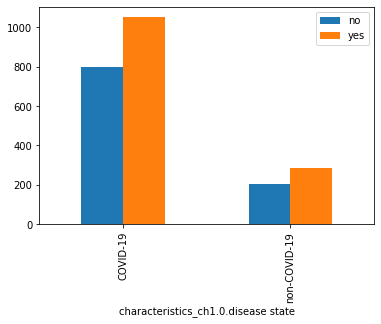



characteristics_ch1.11.crp (mg/l) 

characteristics_ch1.3.icu                    no         yes
characteristics_ch1.0.disease state                        
COVID-19                             119.818605  158.720408
non-COVID-19                          34.733333   99.766667


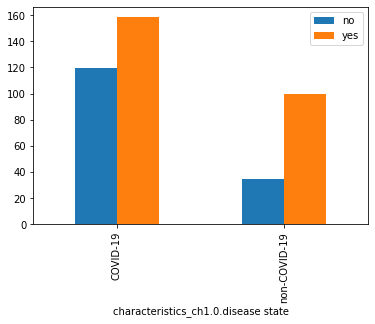



characteristics_ch1.12.ddimer (mg/l_feu) 

characteristics_ch1.3.icu                  no        yes
characteristics_ch1.0.disease state                     
COVID-19                             1.979167  18.880000
non-COVID-19                         5.212500   5.504286


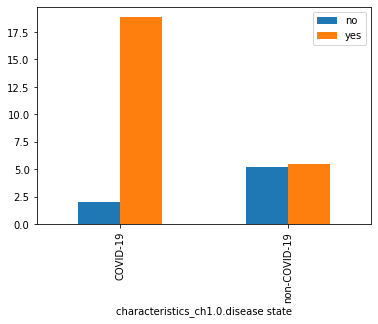



characteristics_ch1.13.procalcitonin (ng/ml) 

characteristics_ch1.3.icu                  no       yes
characteristics_ch1.0.disease state                    
COVID-19                             1.707105  4.434082
non-COVID-19                         2.191667  2.071111


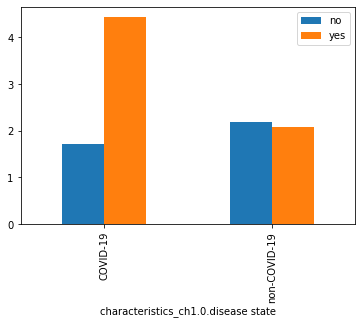



characteristics_ch1.14.lactate (mmol/l) 

characteristics_ch1.3.icu                  no      yes
characteristics_ch1.0.disease state                   
COVID-19                             1.186087  1.27175
non-COVID-19                         1.164286  2.53400


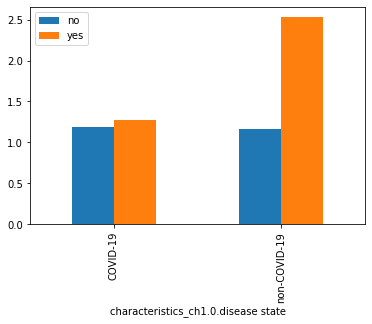



characteristics_ch1.15.fibrinogen 

characteristics_ch1.3.icu                    no         yes
characteristics_ch1.0.disease state                        
COVID-19                             563.558824  528.955556
non-COVID-19                         348.000000  373.000000


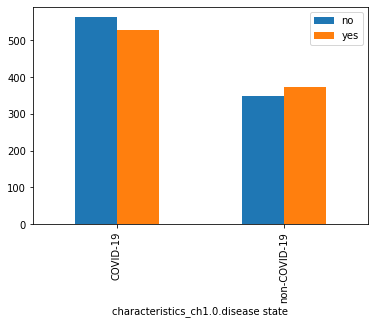

In [29]:
for bio in biomarkers:
    table=pd.pivot_table(metadata,values = bio,index=['characteristics_ch1.0.disease state'],columns=['characteristics_ch1.3.icu'],aggfunc=np.mean)
    print("\n")
    print(bio, "\n")
    print(table)
    table.plot(kind='bar')
    plt.legend()
    plt.show()

Visualizção gráfica das diferenças entre os grupos COVID-19 e não-COVID-19 em ICU para os diferentes biomarcadores:

In [30]:
biomarkers = ['characteristics_ch1.10.ferritin (ng/ml)','characteristics_ch1.11.crp (mg/l)','characteristics_ch1.12.ddimer (mg/l_feu)','characteristics_ch1.13.procalcitonin (ng/ml)','characteristics_ch1.14.lactate (mmol/l)','characteristics_ch1.15.fibrinogen']

cv = metadata[metadata['characteristics_ch1.0.disease state']=='COVID-19']
ncv = metadata[metadata['characteristics_ch1.0.disease state']=='non-COVID-19']

cv_iuc = cv[cv["characteristics_ch1.3.icu"]=="yes"]
ncv_iuc = ncv[ncv["characteristics_ch1.3.icu"]=="yes"]

for bio in biomarkers:
    cv_iuc_bio = cv_iuc[bio].dropna()
    ncv_iuc_bio = ncv_iuc[bio].dropna()

    print("Teste à normalidade dos dados:")
    print('COVID-19 /', bio, stats.shapiro(cv_iuc_bio))
    print('non-COVID-19 /', bio, stats.shapiro(ncv_iuc_bio),"\n")

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.10.ferritin (ng/ml) (0.7296851873397827, 2.939570187265872e-08)
non-COVID-19 / characteristics_ch1.10.ferritin (ng/ml) (0.8502141833305359, 0.0749269500374794) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.11.crp (mg/l) (0.9528987407684326, 0.048432618379592896)
non-COVID-19 / characteristics_ch1.11.crp (mg/l) (0.9312303066253662, 0.49314913153648376) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.12.ddimer (mg/l_feu) (0.6747757196426392, 3.824088157244887e-09)
non-COVID-19 / characteristics_ch1.12.ddimer (mg/l_feu) (0.8394935131072998, 0.09828334301710129) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.13.procalcitonin (ng/ml) (0.33338654041290283, 1.3885003173272348e-13)
non-COVID-19 / characteristics_ch1.13.procalcitonin (ng/ml) (0.4710007309913635, 2.9137365800124826e-06) 

Teste à normalidade dos dados:
COVID-19 / characteristics_ch1.14.lactate (mmol/l) (0.934322535991

Os grupos referentes aos biomarcadores D-dimmer, ferritina e fibrinogénio (p-value > 0.05) não seguem uma distribuição normal. Os grupos referentes aos restantes biomarcadores seguem uma distribuição normal (p-value < 0.05).

In [31]:
print("Teste U de Mann-Whitney")

bio_normal = ['characteristics_ch1.11.crp (mg/l)', 'characteristics_ch1.13.procalcitonin (ng/ml)',"characteristics_ch1.14.lactate (mmol/l)" ]
bio_not_normal = ['characteristics_ch1.10.ferritin (ng/ml)', "characteristics_ch1.12.ddimer (mg/l_feu)", "characteristics_ch1.15.fibrinogen" ]

for bio in bio_not_normal:
    cv_iuc_bio = cv_iuc[bio].dropna()
    ncv_iuc_bio = ncv_iuc[bio].dropna()
    print(stats.mannwhitneyu(cv_iuc_bio, ncv_iuc_bio), bio)


print("ttest")
for bio in bio_normal:
    cv_iuc_bio = cv_iuc[bio].dropna()
    ncv_iuc_bio = ncv_iuc[bio].dropna()
    print(stats.ttest_ind(cv_iuc_bio, ncv_iuc_bio), bio)


Teste U de Mann-Whitney
MannwhitneyuResult(statistic=70.0, pvalue=0.000562692682917295) characteristics_ch1.10.ferritin (ng/ml)
MannwhitneyuResult(statistic=117.0, pvalue=0.09047272300856335) characteristics_ch1.12.ddimer (mg/l_feu)
MannwhitneyuResult(statistic=98.5, pvalue=0.02206858439531203) characteristics_ch1.15.fibrinogen
ttest
Ttest_indResult(statistic=1.559438709104518, pvalue=0.12452661754344743) characteristics_ch1.11.crp (mg/l)
Ttest_indResult(statistic=0.5402356178160989, pvalue=0.5911766977694919) characteristics_ch1.13.procalcitonin (ng/ml)
Ttest_indResult(statistic=-3.2745173761918296, pvalue=0.001868200032359405) characteristics_ch1.14.lactate (mmol/l)


Teste às medianas: 
Existem diferenças estatisticamente signifativos nos seguintes biomarcadores moleculares (p<0.05):
    ferritin (pvalue=pvalue=0.00056)
    fibrinogen (pvalue=0.022)
    lactate (pvalue=0.0018)
    

Verifica-se que, relativamente aos niveis de ferritina e lactato, existem diferenças significativas entre doentes COVID e não-COVID mas também podem estar relacionados sobre o estado de gravidade do doente levando à necessidade de internamento em cuidados intensivos. 